## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset



combo_mouse_data = mouse_metadata.join(study_results.set_index("Mouse ID"), on="Mouse ID")


# Display the data table for preview


combo_mouse_data.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
0,k403,Ramicane,Male,21,16,5,38.825898,0
0,k403,Ramicane,Male,21,16,10,35.014271,1
0,k403,Ramicane,Male,21,16,15,34.223992,1
0,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.


mouse_metadata_count = mouse_metadata["Mouse ID"].count()


combo_mouse_data_count = combo_mouse_data["Mouse ID"].count()

study_results_count = study_results["Mouse ID"].count()

print("mouse ID count for mouse_metadata = " + str(mouse_metadata_count))

print("mouse ID count for study_results = " + str(study_results_count))

print("mouse ID count for combo_mouse_data = " + str(combo_mouse_data_count))

mouse ID count for mouse_metadata = 249
mouse ID count for study_results = 1893
mouse ID count for combo_mouse_data = 1893


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_mouse_data = combo_mouse_data.drop_duplicates(subset = "Mouse ID", keep = "first")

cleaned_mouse_data = combo_mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = "first")

cleaned_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
0,k403,Ramicane,Male,21,16,5,38.825898,0
0,k403,Ramicane,Male,21,16,10,35.014271,1
0,k403,Ramicane,Male,21,16,15,34.223992,1
0,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
248,z969,Naftisol,Male,9,30,25,63.145652,2
248,z969,Naftisol,Male,9,30,30,65.841013,3
248,z969,Naftisol,Male,9,30,35,69.176246,4
248,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.cleaned
cleaned_mouse_data_count = cleaned_mouse_data["Mouse ID"].count()
print("mouse ID count for cleaned_mouse_data = " + str(cleaned_mouse_data_count))


mouse ID count for cleaned_mouse_data = 1888


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_statistics = cleaned_mouse_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].mean()
summary_statistics = summary_statistics.rename(columns = {"Tumor Volume (mm3)": "mean"})
summary_statistics["median"] = cleaned_mouse_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].median()
summary_statistics["variance"] = cleaned_mouse_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].var()
summary_statistics["standard deviation"] = cleaned_mouse_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].std()
summary_statistics["SEM"] = cleaned_mouse_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].sem()

summary_statistics




,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
ameth_summary_statistics = cleaned_mouse_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

ameth_summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

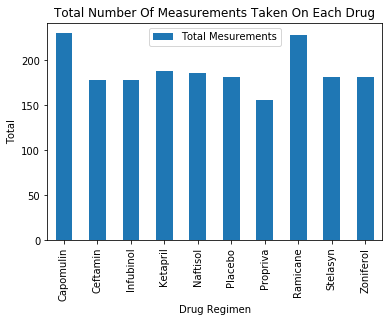

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Total_drug_messure = cleaned_mouse_data.groupby(["Drug Regimen"])[["Mouse ID"]].count()
Total_drug_messure = Total_drug_messure.rename(columns = {"Mouse ID": "Total Mesurements"})


Total_drug_messure_bar = Total_drug_messure.plot.bar()
plt.title("Total Number Of Measurements Taken On Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Total")
Total_drug_messure_bar 


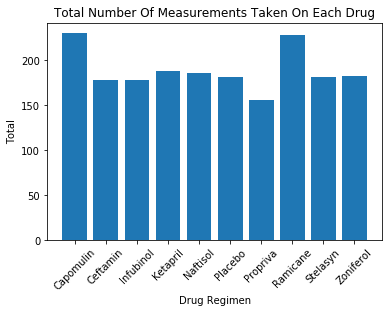

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(x = Total_drug_messure.index.values, height = Total_drug_messure["Total Mesurements"], align="center", )
plt.title("Total Number Of Measurements Taken On Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Total")
plt.xticks(rotation = 45) 
plt.show()

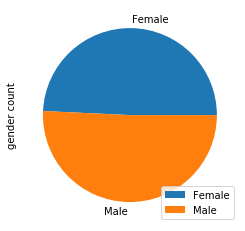

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

cleaned_mouse_data
gender_dist = cleaned_mouse_data.groupby(["Sex"])[["Mouse ID"]].count()
gender_dist = gender_dist.rename(columns = {"Mouse ID" : "gender count"})
gender_dist.plot.pie(y = "gender count")
plt.legend(loc = 'lower right')
plt.show()

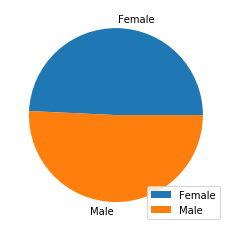

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_dist["gender count"], labels = gender_dist.index.values)
plt.legend(gender_dist.index.values, loc="lower right")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = cleaned_mouse_data.groupby("Mouse ID")[["Timepoint"]].max()

last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_timepoint = last_timepoint.merge(cleaned_mouse_data, on = ["Mouse ID", "Timepoint"])

last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [31]:

final_tumor_cap = last_timepoint[last_timepoint["Drug Regimen"] == "Capomulin"]
final_tumor_ram = last_timepoint[last_timepoint["Drug Regimen"] == "Ramicane"]
final_tumor_inf = last_timepoint[last_timepoint["Drug Regimen"] == "Infubinol"]
final_tumor_cef = last_timepoint[last_timepoint["Drug Regimen"] == "Ceftamin"]


In [60]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_vol_cap = final_tumor_cap["Tumor Volume (mm3)"].tolist()
tumor_vol_ram = final_tumor_ram["Tumor Volume (mm3)"].tolist()
tumor_vol_inf = final_tumor_inf["Tumor Volume (mm3)"].tolist()
tumor_vol_cef = final_tumor_cef["Tumor Volume (mm3)"].tolist()

tumor_vol_all = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]
tumor_label_all = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Determine outliers using upper and lower bounds


quartiles_cap = final_tumor_cap["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
outliers_cap = []
for x in tumor_vol_cap:
    if x > upper_bound_cap or x < lower_bound_cap:
        outliers_cap.append(x)
        
quartiles_ram = final_tumor_ram["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
outliers_ram = []
for x in tumor_vol_ram:
    if x > upper_bound_ram or x < lower_bound_ram:
        outliers_ram.append(x)
        
quartiles_inf = final_tumor_inf["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
outliers_inf = []
for x in tumor_vol_inf:
    if x > upper_bound_inf or x < lower_bound_inf:
        outliers_inf.append(x)
        
quartiles_cef = final_tumor_cef["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef
lower_bound_cef = lowerq_csf - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
outliers_cef = []
for x in tumor_vol_cef:
    if x > upper_bound_cef or x < lower_bound_cef:
        outliers_cef.append(x)        

        
print("these are the outliers for Capomulin")        
print(outliers_cap)
print("these are the outliers for Ramicane")        
print(outliers_ram)
print("these are the outliers for Infubinol")        
print(outliers_inf)
print("these are the outliers for Ceftamin")        
print(outliers_cef)


these are the outliers for Capomulin
[]
these are the outliers for Ramicane
[]
these are the outliers for Infubinol
[36.321345799999996]
these are the outliers for Ceftamin
[]


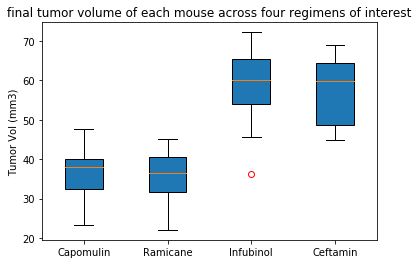

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
c = "r"
fig1, ax1 = plt.subplots()
ax1.set_title('final tumor volume of each mouse across four regimens of interest')
ax1.set_ylabel('Tumor Vol (mm3)')
ax1.set_xticklabels(tumor_label_all)
color_dict = {"patch_artist": True, "flierprops": dict(color = c, markeredgecolor = c)}
ax1.boxplot(tumor_vol_all, **color_dict)
plt.show()



## Line and Scatter Plots

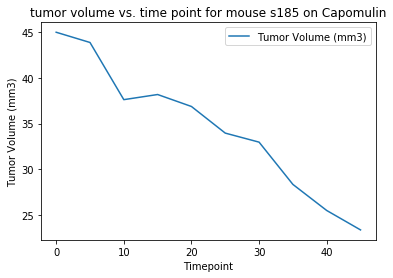

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = cleaned_mouse_data[cleaned_mouse_data["Drug Regimen"] == "Capomulin"]

Capomulin[Capomulin["Mouse ID"] == "s185"].plot.line(x = "Timepoint", y = "Tumor Volume (mm3)")
plt.title("tumor volume vs. time point for mouse s185 on Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


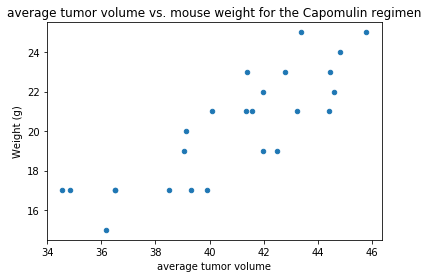

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

tum_vol_vs_m_weight = Capomulin.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()
tum_vol_vs_m_weight = tum_vol_vs_m_weight.rename(columns = {"Tumor Volume (mm3)": "average tumor volume"})

tum_vol_vs_m_weight.plot.scatter(x = "average tumor volume", y = "Weight (g)" )

plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.show()


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [23]:
corr = tum_vol_vs_m_weight.corr(method = "pearson")
corr.unstack().sort_values()  

average tumor volume  Weight (g)              0.841936
Weight (g)            average tumor volume    0.841936
average tumor volume  average tumor volume    1.000000
Weight (g)            Weight (g)              1.000000
dtype: float64

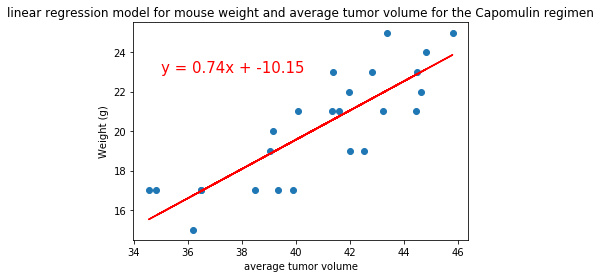

In [27]:
x_values = tum_vol_vs_m_weight["average tumor volume"]
y_values = tum_vol_vs_m_weight["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,23),fontsize=15,color="red")
plt.xlabel("average tumor volume")
plt.ylabel("Weight (g)")
plt.title("linear regression model for mouse weight and average tumor volume for the Capomulin regimen")
plt.show()